**Atualizando a biblioteca para plotagem de gráficos**


**Importando bibliotecas**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.preprocessing import LabelEncoder


**Abrindo um arquivo CSV do drive**

In [3]:
base = pd.read_csv(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\dataset\train.csv')

In [4]:
base

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Contando quantidade de instâncias**


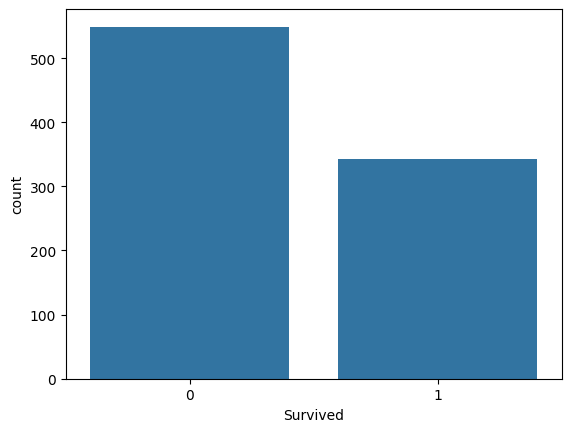

In [5]:
classificacao = base.columns[1]
np.unique(base[classificacao], return_counts=True)
sns.countplot(x = base[classificacao]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [6]:
# Verificar valores ausentes
base.isnull().sum()

# Tratamento para valores ausentes
# Para Age: preencher com a média ou mediana
base['Age'] = base['Age'].fillna(base['Age'].median())

# Para Embarked: preencher com o valor mais frequente
base['Embarked'] = base['Embarked'].fillna(base['Embarked'].mode()[0])

# Para Cabin: criar uma categoria para "desconhecido" ou usar um indicador de ausência
base['Cabin_missing'] = base['Cabin'].isnull().astype(int)
# Ou simplesmente preencher com um valor como 'Unknown'
base['Cabin'] = base['Cabin'].fillna('Unknown')


base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_missing
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

In [7]:
base['Title'] = base['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupar titulos menos comuns
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
base.loc[base['Title'].isin(rare_titles), 'Title'] = 'Rare'
base.loc[base['Title'] == 'Mlle', 'Title'] = 'Miss'
base.loc[base['Title'] == 'Ms', 'Title'] = 'Miss'
base.loc[base['Title'] == 'Mme', 'Title'] = 'Mrs'

# Criar característica de tamanho da família
base['FamilySize'] = base['SibSp'] + base['Parch'] + 1

# Criar indicador de viajante sozinho
base['IsAlone'] = (base['FamilySize'] == 1).astype(int)

# Extrair informação da cabine (primeira letra)
base['Cabin_prefix'] = base['Cabin'].str[0]

base['Survived'] = 'Sobreviveu' if base['Survived'] == 1 else 'Não sobreviveu'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
np.unique(base['Cabin'])

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
cols_onehot_encode = ['Pclass', 'Sex', 'Embarked', 'Title', 'Cabin_prefix']

# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False, drop='first') # drop='first' evita multicolinearidade

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_colunas)

In [ ]:
# Variáveis numéricas para normalização/padronização
cols_numericas = ['Age', 'Fare', 'FamilySize']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(base[cols_numericas])
df_scaled = pd.DataFrame(df_scaled, columns=cols_numericas)

In [ ]:
colunas_a_manter = ['IsAlone']

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([
        df_onehot,
        df_scaled,
        base[colunas_a_manter],
        base['Survived'] #target
    ],
    axis=1
)

In [ ]:
colunas_a_remover = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'PassengerId'] 
base = base.drop(columns=colunas_a_remover)

In [ ]:
base_encoded

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Cabin_prefix_B,...,Cabin_prefix_E,Cabin_prefix_F,Cabin_prefix_G,Cabin_prefix_T,Cabin_prefix_U,Age,Fare,FamilySize,IsAlone,Survived
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.565736,-0.502445,0.059160,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.663861,0.786845,0.059160,0,1
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.258337,-0.488854,-0.560975,1,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.433312,0.420730,0.059160,0,1
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.433312,-0.486337,-0.560975,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.181487,-0.386671,-0.560975,1,0
887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,-0.796286,-0.044381,-0.560975,1,1
888,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.104637,-0.176263,1.299429,0,0
889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.258337,-0.044381,-0.560975,1,1


In [ ]:
base_encoded.shape

(891, 22)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [ ]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_prev

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Cabin_prefix_B,...,Cabin_prefix_D,Cabin_prefix_E,Cabin_prefix_F,Cabin_prefix_G,Cabin_prefix_T,Cabin_prefix_U,Age,Fare,FamilySize,IsAlone
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.565736,-0.502445,0.059160,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.663861,0.786845,0.059160,0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.258337,-0.488854,-0.560975,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.433312,0.420730,0.059160,0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.433312,-0.486337,-0.560975,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.181487,-0.386671,-0.560975,1
887,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.796286,-0.044381,-0.560975,1
888,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.104637,-0.176263,1.299429,0
889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.258337,-0.044381,-0.560975,1


In [ ]:
y_classe

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
y_classe.shape

(891,)

In [ ]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [ ]:
X_treino.shape

(712, 21)

In [ ]:
X_teste.shape

(179, 21)

In [ ]:
X_teste

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Cabin_prefix_B,...,Cabin_prefix_D,Cabin_prefix_E,Cabin_prefix_F,Cabin_prefix_G,Cabin_prefix_T,Cabin_prefix_U,Age,Fare,FamilySize,IsAlone
709,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.104637,-0.341452,0.679295,0
439,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.125912,-0.437007,-0.560975,1
840,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.719436,-0.488854,-0.560975,1
720,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.795334,0.016023,0.059160,0
39,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.180535,-0.422074,0.059160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.949986,-0.504962,-0.560975,1
773,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.104637,-0.502949,-0.560975,1
25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.663861,-0.016444,3.159833,0
84,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.949986,-0.437007,-0.560975,1


In [ ]:
y_treino

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_teste

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [ ]:
import pickle

In [ ]:
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\titanic.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)